In [21]:
import pandas as pd
import numpy as np
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from xgboost.sklearn import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
from sklearn import metrics
from sklearn.model_selection import train_test_split
RANDOM_SEED = 42

In [4]:
last_dirs = ["1_android.sensor.accelerometer.data.csv.gz"]#,"4_android.sensor.gyroscope.data.csv.gz"]
path = "Sessions_new/"
dirs = []
dir_list = [x[0] for x in os.walk(path)]
for each_dir in dir_list[2:]:

    if "data" in each_dir:
    #each_file = os.listdir(each_dir)
        dirs.append(each_dir)
        


dirs.sort(key=lambda x:x[-22:])
gy_shapes = []
print(dirs[0])
#avg_acc_gy = pd.DataFrame(columns = ["avg_acc_x","avg_acc_y","avg_acc_x", "avg_gyroscope_x",  "avg_gyroscope_y",  "avg_gyroscope_z",  "label"])
for i in dirs[0:1]:
    #print(i)
    full_path_acc = os.path.normpath(i + "/" + "1_android.sensor.accelerometer.data.csv.gz")
    full_path_gy = os.path.normpath(i + "/" + "4_android.sensor.gyroscope.data.csv.gz")
    print("processing : " + full_path_acc)
    df_ac = pd.read_csv(full_path_acc, compression='gzip', sep=',', header=None)
    df_gy = pd.read_csv(full_path_gy, compression='gzip', sep=',', header=None)
    #new_df_ac = process_avg_acceleration(df_ac)
    #new_df_gy = process_avg_gyroscope(df_gy)
    #print(new_df_ac.head())
    #print(new_df_gy.head())
    #if new_df_gy.shape[0] < new_df_ac.shape[0]:
        #new_df_ac = new_df_ac[:new_df_gy.shape[0]]
    #new_df = pd.concat([new_df_ac,new_df_gy], axis = 1)
    #print(new_df.head())   
    #print(new_df.shape)
    #print(avg_acc_gy.shape)
    #gy_shapes.append(new_df.shape)
    #avg_acc_gy = new_df

for i in dirs[1:]:
    print(i)
    full_path_acc = os.path.normpath(i + "/" + "1_android.sensor.accelerometer.data.csv.gz")
    full_path_gy = os.path.normpath(i + "/" + "4_android.sensor.gyroscope.data.csv.gz")
    #if full_path_acc == "Sessions2\Sessions2\14442D57F7E1B88_Mon_Feb_12_18-26_2018_PST\data\1_android.sensor.accelerometer.data.csv.gz":
        #continue
    print("processing : " + full_path_acc)
    df_ac_new = pd.read_csv(full_path_acc, compression='gzip', sep=',', header=None)
    #print("processing : " + full_path_gy)
    #df_gy = pd.read_csv(full_path_gy, compression='gzip', sep=',', header=None)
    #new_df_ac = process_avg_acceleration(df_ac)
    #new_df_gy = process_avg_gyroscope(df_gy)
    #print(new_df_ac.head())
    #print(new_df_gy.head())
    #if new_df_gy.shape[0] < new_df_ac.shape[0]:
    #df_ac = new_df_ac[:new_df_gy.shape[0]]
    print(df_ac.shape)
    df_ac = pd.concat([df_ac,df_ac_new], axis = 0)
    #print(new_df.head())   
    #print(new_df.shape)
    #print(avg_acc_gy.shape)
    #gy_shapes.append(new_df.shape)
    #avg_acc_gy = pd.concat([avg_acc_gy,new_df])


print(df_ac.shape)

Sessions_new/14442D57F7E1B88_Thu_Feb_08_00-16_2018_PST\data
processing : Sessions_new\14442D57F7E1B88_Thu_Feb_08_00-16_2018_PST\data\1_android.sensor.accelerometer.data.csv.gz
Sessions_new/14442D57F7E1B88_Thu_Feb_08_00-18_2018_PST\data
processing : Sessions_new\14442D57F7E1B88_Thu_Feb_08_00-18_2018_PST\data\1_android.sensor.accelerometer.data.csv.gz
(2794, 6)
Sessions_new/14442D57F7E1B88_Thu_Feb_08_00-25_2018_PST\data
processing : Sessions_new\14442D57F7E1B88_Thu_Feb_08_00-25_2018_PST\data\1_android.sensor.accelerometer.data.csv.gz
(5501, 6)
Sessions_new/14442D57F7E1B88_Thu_Feb_08_00-31_2018_PST\data
processing : Sessions_new\14442D57F7E1B88_Thu_Feb_08_00-31_2018_PST\data\1_android.sensor.accelerometer.data.csv.gz
(10489, 6)
Sessions_new/14442D57F7E1B88_Thu_Feb_08_00-35_2018_PST\data
processing : Sessions_new\14442D57F7E1B88_Thu_Feb_08_00-35_2018_PST\data\1_android.sensor.accelerometer.data.csv.gz
(44868, 6)
Sessions_new/14442D57F7E1B88_Thu_Feb_08_00-38_2018_PST\data
processing : Sessi

In [7]:
df_ac.head()

,0,1,2,3,4,5
0,1518077795949,1.699485,2.139914,8.976151,3,sitting
1,1518077795958,1.699485,2.120765,9.033598,3,sitting
2,1518077795962,1.737783,2.120765,8.976151,3,sitting
3,1518077795966,1.776081,2.063318,8.995299,3,sitting
4,1518077795970,1.737783,2.025020,8.918703,3,sitting


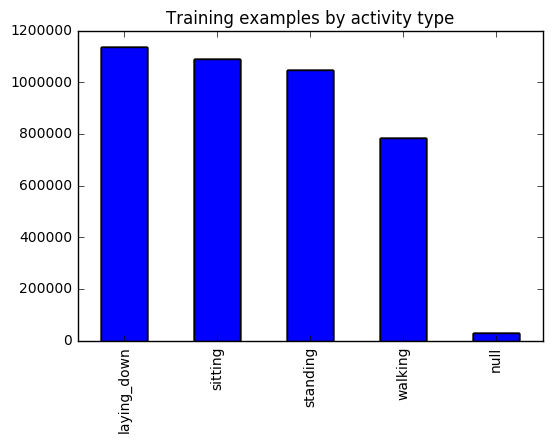

In [11]:
df_ac[5].value_counts().plot(kind='bar', title='Training examples by activity type')
plt.show()

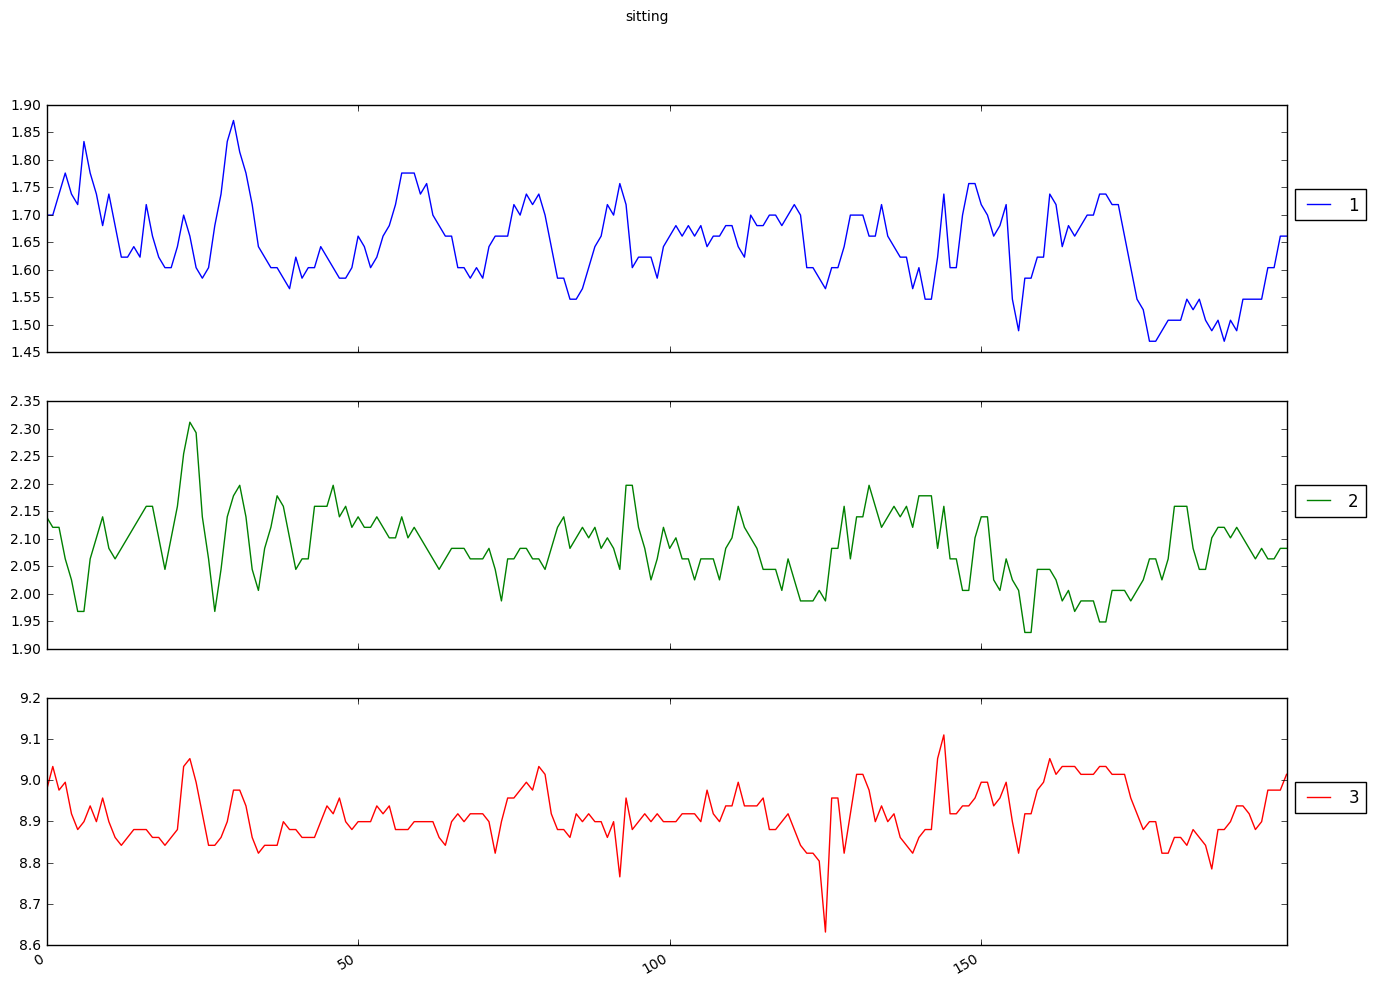

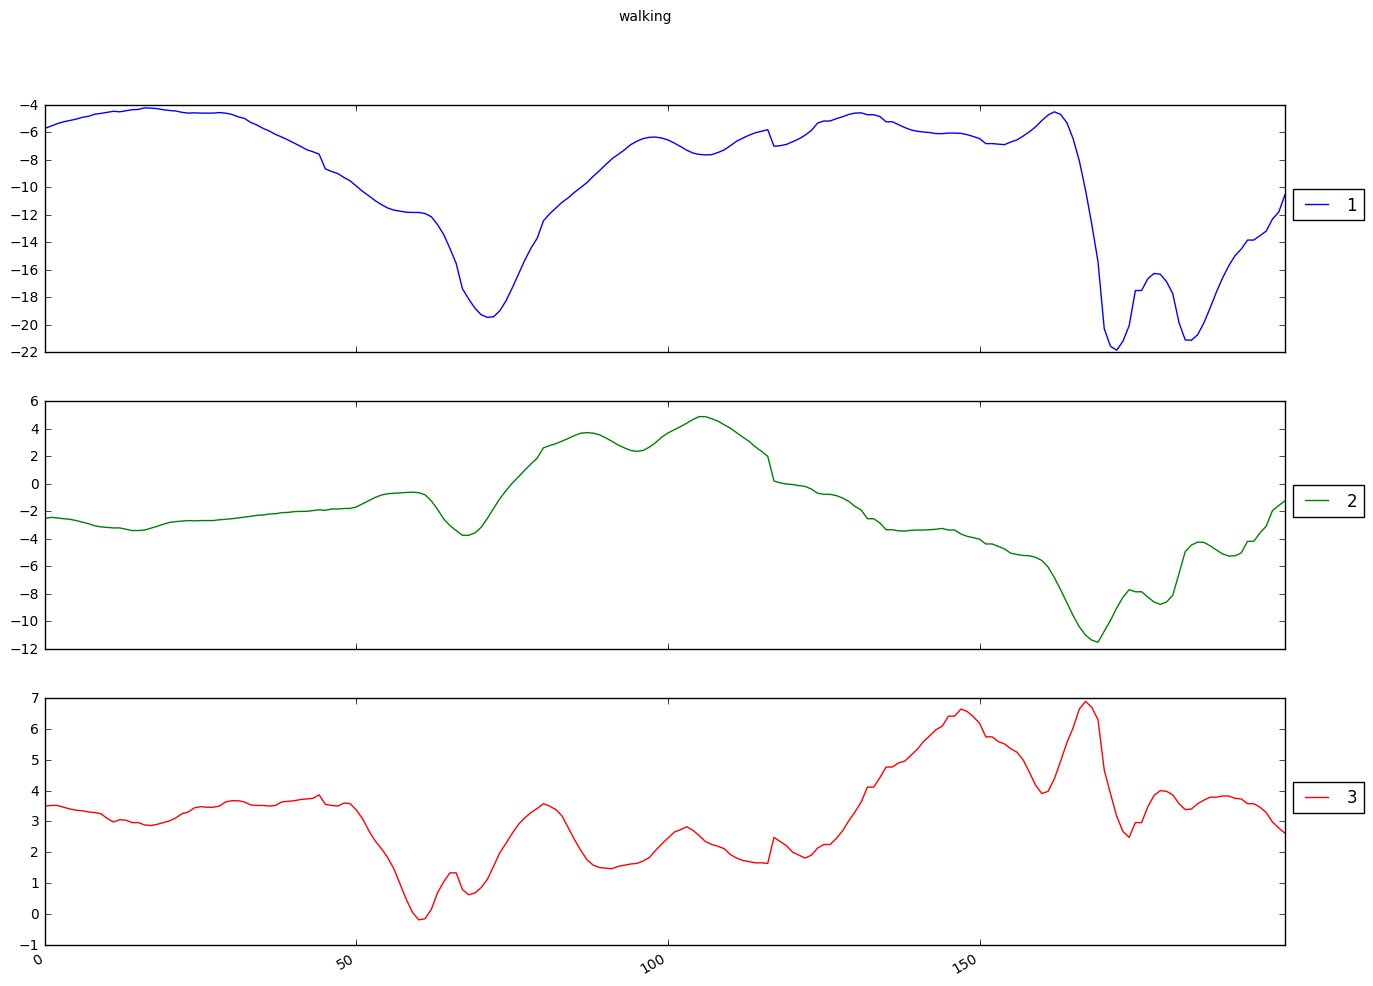

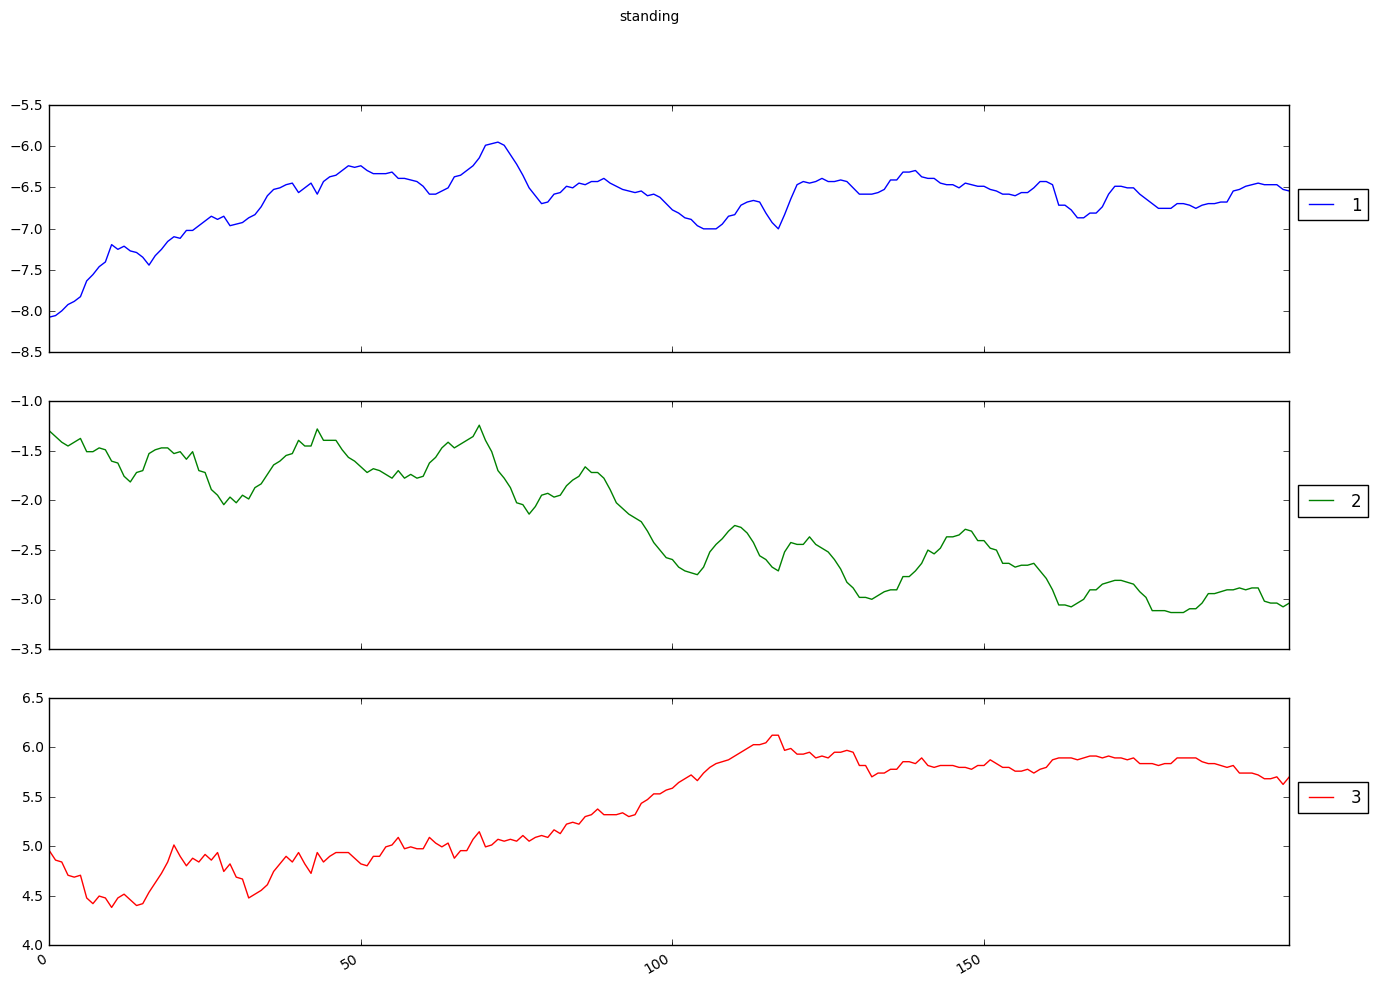

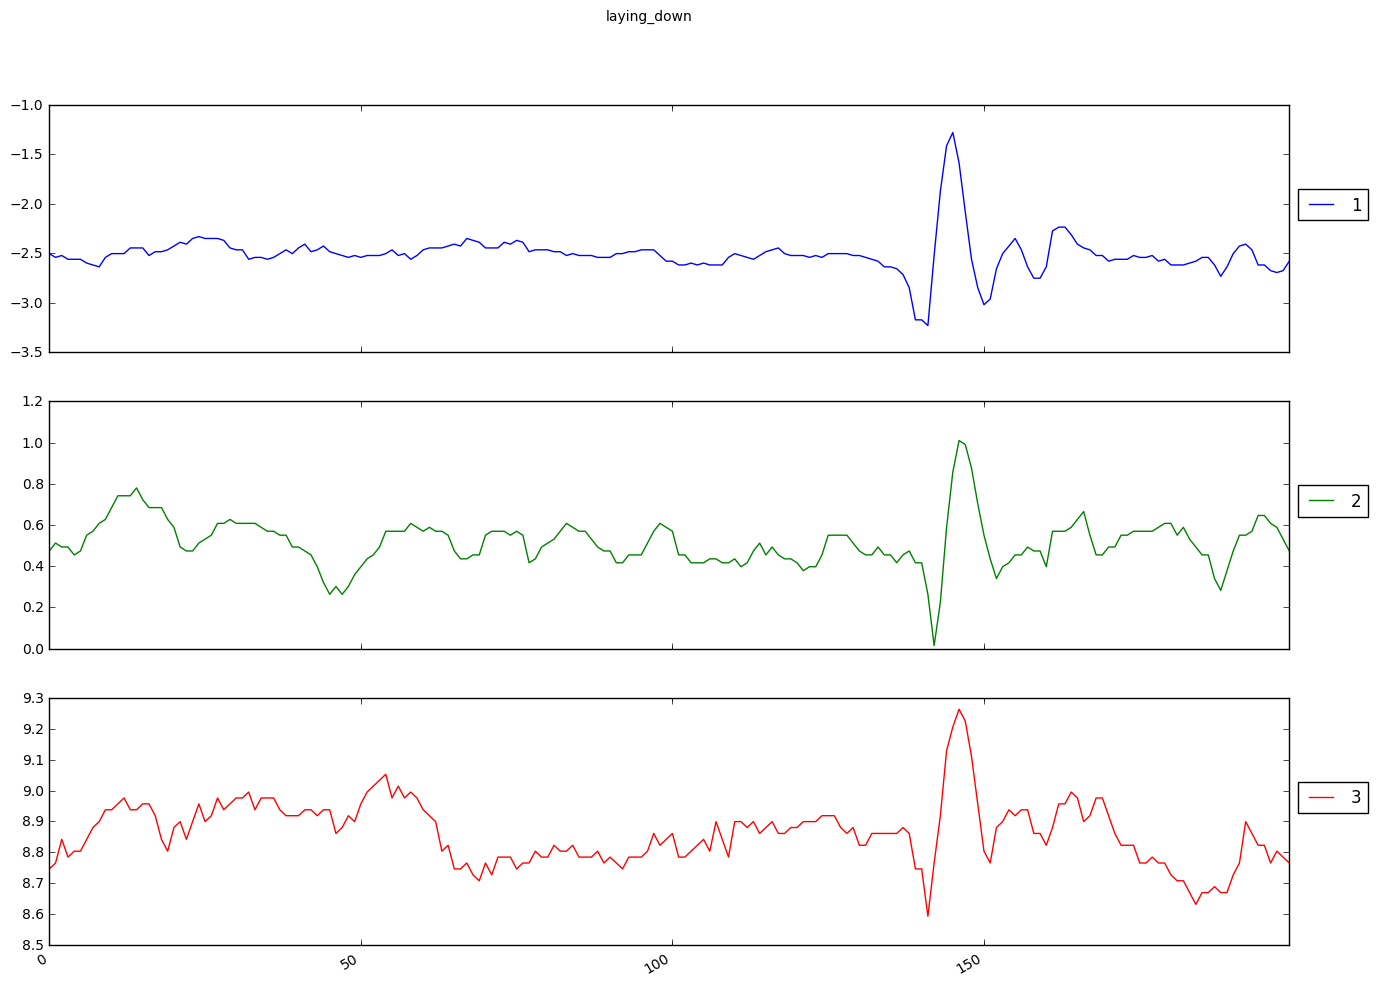

In [14]:
def plot_activity(activity, df):
    data = df[df[5] == activity][[1, 2, 3]][:200]
    axis = data.plot(subplots=True, figsize=(16, 12), 
                     title=activity)
    for ax in axis:
        ax.legend(loc='lower left', bbox_to_anchor=(1.0, 0.5))
plot_activity("sitting", df_ac)
plt.show()
plot_activity("walking", df_ac)
plt.show()
plot_activity("standing", df_ac)
plt.show()
plot_activity("laying_down", df_ac)
plt.show()

In [16]:
N_TIME_STEPS = 2000
N_FEATURES = 3
step = 1000
segments = []
labels = []
for i in range(0, len(df_ac) - N_TIME_STEPS, step):
    xs = df_ac[1].values[i: i + N_TIME_STEPS]
    ys = df_ac[2].values[i: i + N_TIME_STEPS]
    zs = df_ac[3].values[i: i + N_TIME_STEPS]
    label = stats.mode(df_ac[5][i: i + N_TIME_STEPS])[0][0]
    segments.append([xs, ys, zs])
    labels.append(label)

d:\anaconda\lib\site-packages\scipy\stats\stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


In [18]:
print(np.array(segments).shape)
reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, N_TIME_STEPS, N_FEATURES)
labels = np.asarray(pd.get_dummies(labels), dtype = np.float32)
print(reshaped_segments.shape)

(4087, 3, 2000)
(4087, 2000, 3)


In [19]:
labels[0]

array([0., 0., 1., 0., 0.], dtype=float32)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
        reshaped_segments, labels, test_size=0.2, random_state=RANDOM_SEED)

In [24]:
N_CLASSES = 5
N_HIDDEN_UNITS = 64
def create_LSTM_model(inputs):
    W = {
        'hidden': tf.Variable(tf.random_normal([N_FEATURES, N_HIDDEN_UNITS])),
        'output': tf.Variable(tf.random_normal([N_HIDDEN_UNITS, N_CLASSES]))
    }
    biases = {
        'hidden': tf.Variable(tf.random_normal([N_HIDDEN_UNITS], mean=1.0)),
        'output': tf.Variable(tf.random_normal([N_CLASSES]))
    }
    
    X = tf.transpose(inputs, [1, 0, 2])
    X = tf.reshape(X, [-1, N_FEATURES])
    hidden = tf.nn.relu(tf.matmul(X, W['hidden']) + biases['hidden'])
    hidden = tf.split(hidden, N_TIME_STEPS, 0)

    # Stack 2 LSTM layers
    lstm_layers = [tf.contrib.rnn.BasicLSTMCell(N_HIDDEN_UNITS, forget_bias=1.0) for _ in range(2)]
    lstm_layers = tf.contrib.rnn.MultiRNNCell(lstm_layers)

    outputs, _ = tf.contrib.rnn.static_rnn(lstm_layers, hidden, dtype=tf.float32)

    # Get output for the last time step
    lstm_last_output = outputs[-1]

    return tf.matmul(lstm_last_output, W['output']) + biases['output']

In [25]:
tf.reset_default_graph()

X = tf.placeholder(tf.float32, [None, N_TIME_STEPS, N_FEATURES], name="input")
Y = tf.placeholder(tf.float32, [None, N_CLASSES])

In [26]:
pred_Y = create_LSTM_model(X)

pred_softmax = tf.nn.softmax(pred_Y, name="y_")

In [27]:
L2_LOSS = 0.0015

l2 = L2_LOSS * \
    sum(tf.nn.l2_loss(tf_var) for tf_var in tf.trainable_variables())

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = pred_Y, labels = Y)) + l2

In [28]:
LEARNING_RATE = 0.0025

optimizer = tf.train.AdamOptimizer(learning_rate=LEARNING_RATE).minimize(loss)

correct_pred = tf.equal(tf.argmax(pred_softmax, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, dtype=tf.float32))

In [32]:
N_EPOCHS = 50
BATCH_SIZE = 64
saver = tf.train.Saver()

history = dict(train_loss=[], 
                     train_acc=[], 
                     test_loss=[], 
                     test_acc=[])

sess=tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

train_count = len(X_train)

for i in range(1, N_EPOCHS + 1):
    for start, end in zip(range(0, train_count, BATCH_SIZE),
                          range(BATCH_SIZE, train_count + 1,BATCH_SIZE)):
        sess.run(optimizer, feed_dict={X: X_train[start:end],
                                       Y: y_train[start:end]})

    _, acc_train, loss_train = sess.run([pred_softmax, accuracy, loss], feed_dict={
                                            X: X_train, Y: y_train})

    _, acc_test, loss_test = sess.run([pred_softmax, accuracy, loss], feed_dict={
                                            X: X_test, Y: y_test})

    history['train_loss'].append(loss_train)
    history['train_acc'].append(acc_train)
    history['test_loss'].append(loss_test)
    history['test_acc'].append(acc_test)

    #if i != 1 and i % 10 != 0:
        #continue

    print('epoch: ' + str(i) + ' test accuracy :' + str(acc_test) + ' loss :' +str(loss_test))
    
predictions, acc_final, loss_final = sess.run([pred_softmax, accuracy, loss], feed_dict={X: X_test, Y: y_test})

print()
print('final results : accuracy :' +str(acc_final) + ' loss: ' +str(loss_final))

ResourceExhaustedError: OOM when allocating tensor with shape[6538000,64]
	 [[Node: MatMul = MatMul[T=DT_FLOAT, transpose_a=false, transpose_b=false, _device="/job:localhost/replica:0/task:0/device:GPU:0"](Reshape, Variable/read)]]
	 [[Node: add_10/_93 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_108189_add_10", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

Caused by op 'MatMul', defined at:
  File "d:\anaconda\lib\runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "d:\anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "d:\anaconda\lib\site-packages\ipykernel\__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "d:\anaconda\lib\site-packages\traitlets\config\application.py", line 653, in launch_instance
    app.start()
  File "d:\anaconda\lib\site-packages\ipykernel\kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "d:\anaconda\lib\site-packages\zmq\eventloop\ioloop.py", line 162, in start
    super(ZMQIOLoop, self).start()
  File "d:\anaconda\lib\site-packages\tornado\ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "d:\anaconda\lib\site-packages\tornado\stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "d:\anaconda\lib\site-packages\zmq\eventloop\zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "d:\anaconda\lib\site-packages\zmq\eventloop\zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "d:\anaconda\lib\site-packages\zmq\eventloop\zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "d:\anaconda\lib\site-packages\tornado\stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "d:\anaconda\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "d:\anaconda\lib\site-packages\ipykernel\kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "d:\anaconda\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "d:\anaconda\lib\site-packages\ipykernel\ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "d:\anaconda\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "d:\anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "d:\anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "d:\anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-26-b6033229688f>", line 1, in <module>
    pred_Y = create_LSTM_model(X)
  File "<ipython-input-24-732a5a1c4f06>", line 15, in create_LSTM_model
    hidden = tf.nn.relu(tf.matmul(X, W['hidden']) + biases['hidden'])
  File "d:\anaconda\lib\site-packages\tensorflow\python\ops\math_ops.py", line 1891, in matmul
    a, b, transpose_a=transpose_a, transpose_b=transpose_b, name=name)
  File "d:\anaconda\lib\site-packages\tensorflow\python\ops\gen_math_ops.py", line 2436, in _mat_mul
    name=name)
  File "d:\anaconda\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "d:\anaconda\lib\site-packages\tensorflow\python\framework\ops.py", line 2956, in create_op
    op_def=op_def)
  File "d:\anaconda\lib\site-packages\tensorflow\python\framework\ops.py", line 1470, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

ResourceExhaustedError (see above for traceback): OOM when allocating tensor with shape[6538000,64]
	 [[Node: MatMul = MatMul[T=DT_FLOAT, transpose_a=false, transpose_b=false, _device="/job:localhost/replica:0/task:0/device:GPU:0"](Reshape, Variable/read)]]
	 [[Node: add_10/_93 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_108189_add_10", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]
